In [1]:
# go # change root path one level up
import os
os.chdir("../results/")


In [2]:
# pandas, numpy and matplotlib are imported by default
import itertools

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [59]:
# read eval_errors csv files and plot smapes
eval_errors_30 = pd.read_csv("caltech_igmm/eval_errors_30.csv")
eval_errors_60 = pd.read_csv("caltech_igmm/eval_errors_60.csv")
eval_errors_120 = pd.read_csv("caltech_igmm/eval_errors_120.csv")
eval_errors_240 = pd.read_csv("caltech_igmm/eval_errors_240.csv")
eval_errors_360 = pd.read_csv("caltech_igmm/eval_errors_360.csv")
eval_errors_480 = pd.read_csv("caltech_igmm/eval_errors_480.csv")
pg_eval_errors_30 = pd.read_csv("caltech_pgmm/eval_errors_30.csv")
pg_eval_errors_60 = pd.read_csv("caltech_pgmm/eval_errors_60.csv")
pg_eval_errors_120 = pd.read_csv("caltech_pgmm/eval_errors_120.csv")
pg_eval_errors_240 = pd.read_csv("caltech_pgmm/eval_errors_240.csv")
pg_eval_errors_360 = pd.read_csv("caltech_pgmm/eval_errors_360.csv")
pg_eval_errors_480 = pd.read_csv("caltech_pgmm/eval_errors_480.csv")
# read lightgbm csv file
lightgbm = pd.read_csv("lightgbm_energy.csv")
# read lightgnm no logs
lightgbm_no_logs = pd.read_csv("lightgbm_energy_nologs.csv")
# read similar sessions file
similar = pd.read_csv("similar_sessions_energy.csv")
# read similar sessions no logs csv file
simialar_no_logs = pd.read_csv("similar_sessions_energy_nologs.csv")
# make a dataframe with all errors mean
errors = pd.DataFrame(index=["30", "60", "120", "240", "360", "480"])
errors["I-GMM"] = [
    eval_errors_30.mean()["errors"],
    eval_errors_60.mean()["errors"],
    eval_errors_120.mean()["errors"],
    eval_errors_240.mean()["errors"],
    eval_errors_360.mean()["errors"],
    eval_errors_480.mean()["errors"],
]
errors["P-GMM"] = [
    pg_eval_errors_30.mean()["errors"],
    pg_eval_errors_60.mean()["errors"],
    pg_eval_errors_120.mean()["errors"],
    pg_eval_errors_240.mean()["errors"],
    pg_eval_errors_360.mean()["errors"],
    pg_eval_errors_480.mean()["errors"],
]
errors["Mean"] = [
    eval_errors_30.mean()["mean_err"],
    eval_errors_60.mean()["mean_err"],
    eval_errors_120.mean()["mean_err"],
    eval_errors_240.mean()["mean_err"],
    eval_errors_360.mean()["mean_err"],
    eval_errors_480.mean()["mean_err"],
]
errors["Logged LGBM"] = lightgbm["mae"].values
errors["LGBM"] = lightgbm_no_logs["mae"].values
errors["Logged similar sessions"] = similar["mae"].values
errors["Similar sessions"] = simialar_no_logs["mae"].values
errors["User Input"] = 7.174058
errors


,I-GMM,P-GMM,Mean,Logged LGBM,LGBM,Logged similar sessions,Similar sessions,User Input
30,1.687307,1.686800,1.823266,5.452993,5.177373,1.644883,4.033828,7.174058
60,1.339236,1.491034,1.808971,2.448586,5.729720,1.412750,4.210572,7.174058
120,1.655026,1.747119,3.383456,1.809321,5.494731,1.102331,4.031037,7.174058
240,1.566439,1.492920,3.696127,1.458064,4.346333,1.072337,3.850297,7.174058
360,1.724717,1.723376,4.137654,1.519542,4.478784,1.194853,3.807234,7.174058
480,1.694534,1.709216,4.092760,1.402718,4.374860,1.177285,3.862170,7.174058


In [60]:
errors
# rearrange the columns so that mean and user input are at the end
errors = errors[
    [
        "Logged LGBM",
        "Logged similar sessions",
        "P-GMM",
        "I-GMM",
        "LGBM",
        "Similar sessions",
        "Mean",
        "User Input",
    ]
]
# name index for the lookback period
errors.index.name = "Lookback period"
# save to results folder, mention mae for parking duration
# errors.to_csv('results/mae_energy.csv')
errors.round(3)

,Logged LGBM,Logged similar sessions,P-GMM,I-GMM,LGBM,Similar sessions,Mean,User Input
Lookback period,,,,,,,,
30,5.453,1.645,1.687,1.687,5.177,4.034,1.823,7.174
60,2.449,1.413,1.491,1.339,5.730,4.211,1.809,7.174
120,1.809,1.102,1.747,1.655,5.495,4.031,3.383,7.174
240,1.458,1.072,1.493,1.566,4.346,3.850,3.696,7.174
360,1.520,1.195,1.723,1.725,4.479,3.807,4.138,7.174
480,1.403,1.177,1.709,1.695,4.375,3.862,4.093,7.174


/var/folders/8b/4kssy4kj57jb6rv1pmm5w8h80000gn/T/ipykernel_75046/54548624.py:123: MatplotlibDeprecationWarning: MarkerStyle(None) is deprecated since 3.6; support will be removed two minor releases later.  Use MarkerStyle('') to construct an empty MarkerStyle.
  legend3.legendHandles[0].set_marker(None)
/var/folders/8b/4kssy4kj57jb6rv1pmm5w8h80000gn/T/ipykernel_75046/54548624.py:124: MatplotlibDeprecationWarning: MarkerStyle(None) is deprecated since 3.6; support will be removed two minor releases later.  Use MarkerStyle('') to construct an empty MarkerStyle.
  legend3.legendHandles[1].set_marker(None)


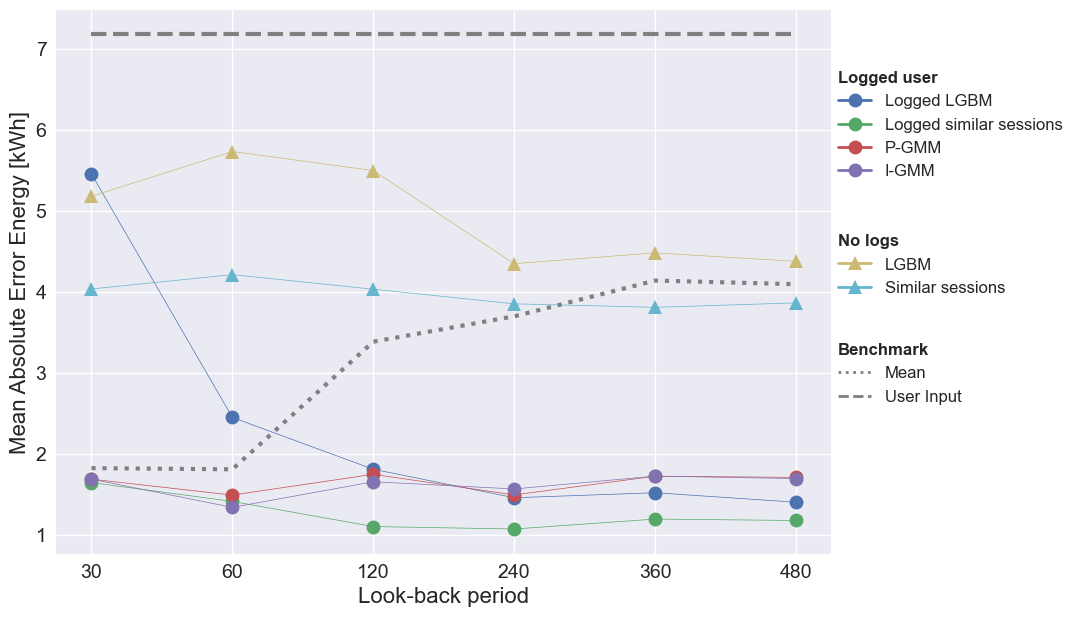

In [62]:
make_plot(errors, "Mean Absolute Error Energy [kWh]", hide_legend=False)

In [63]:
# similar but with duration
# read eval_errors csv files and plot smapes
eval_errors_30 = pd.read_csv("caltech_igmm/eval_errors_duration_30.csv")
eval_errors_60 = pd.read_csv("caltech_igmm/eval_errors_duration_60.csv")
eval_errors_120 = pd.read_csv("caltech_igmm/eval_errors_duration_120.csv")
eval_errors_240 = pd.read_csv("caltech_igmm/eval_errors_duration_240.csv")
eval_errors_360 = pd.read_csv("caltech_igmm/eval_errors_duration_360.csv")
eval_errors_480 = pd.read_csv("caltech_igmm/eval_errors_duration_480.csv")
pg_eval_errors_30 = pd.read_csv("caltech_pgmm/eval_errors_duration_30.csv")
pg_eval_errors_60 = pd.read_csv("caltech_pgmm/eval_errors_duration_60.csv")
pg_eval_errors_120 = pd.read_csv("caltech_pgmm/eval_errors_duration_120.csv")
pg_eval_errors_240 = pd.read_csv("caltech_pgmm/eval_errors_duration_240.csv")
pg_eval_errors_360 = pd.read_csv("caltech_pgmm/eval_errors_duration_360.csv")
pg_eval_errors_480 = pd.read_csv("caltech_pgmm/eval_errors_duration_480.csv")
lightgbm = pd.read_csv("lightgbm_duration.csv")
lightgbm_no_logs = pd.read_csv("lightgbm_duration_nologs.csv")
similar = pd.read_csv("similar_sessions_duration.csv")
simialar_no_logs = pd.read_csv("similar_sessions_duration_nologs.csv")
errors = pd.DataFrame(index=["30", "60", "120", "240", "360", "480"])
errors["I-GMM"] = [
    eval_errors_30.mean()["errors"],
    eval_errors_60.mean()["errors"],
    eval_errors_120.mean()["errors"],
    eval_errors_240.mean()["errors"],
    eval_errors_360.mean()["errors"],
    eval_errors_480.mean()["errors"],
]
errors["P-GMM"] = [
    pg_eval_errors_30.mean()["errors"],
    pg_eval_errors_60.mean()["errors"],
    pg_eval_errors_120.mean()["errors"],
    pg_eval_errors_240.mean()["errors"],
    pg_eval_errors_360.mean()["errors"],
    pg_eval_errors_480.mean()["errors"],
]
errors["Mean"] = [
    eval_errors_30.mean()["mean_err"],
    eval_errors_60.mean()["mean_err"],
    eval_errors_120.mean()["mean_err"],
    eval_errors_240.mean()["mean_err"],
    eval_errors_360.mean()["mean_err"],
    eval_errors_480.mean()["mean_err"],
]
errors["Logged LGBM"] = lightgbm["mae"].values
errors["LGBM"] = lightgbm_no_logs["mae"].values
errors["Logged similar sessions"] = similar["mae"].values
errors["Similar sessions"] = simialar_no_logs["mae"].values
errors["User Input"] = 2.5341190876014554
errors


,I-GMM,P-GMM,Mean,Logged LGBM,LGBM,Logged similar sessions,Similar sessions,User Input
30,2.131519,2.148223,1.763943,2.506168,2.532120,1.804577,2.262368,2.534119
60,1.647070,1.722588,1.534380,2.172904,2.541208,1.749926,2.138596,2.534119
120,3.061900,3.122099,1.811645,1.881937,2.481275,1.777007,2.146058,2.534119
240,3.691787,3.437610,1.694160,1.918964,2.502666,1.618816,2.221841,2.534119
360,4.018913,3.943763,1.996885,1.798506,2.470211,1.589503,2.153708,2.534119
480,3.958048,4.000222,2.029143,1.856693,2.503830,1.580340,2.176269,2.534119


In [64]:
errors
# rearrange the columns so that mean and user input are at the end
errors = errors[
    [
        "Logged LGBM",
        "Logged similar sessions",
        "P-GMM",
        "I-GMM",
        "LGBM",
        "Similar sessions",
        "Mean",
        "User Input",
    ]
]
# name index for the lookback period
errors.index.name = "Lookback period"
# save to results folder, mention mae for parking duration
# errors.to_csv('results/mae_energy.csv')
errors.round(3)


,Logged LGBM,Logged similar sessions,P-GMM,I-GMM,LGBM,Similar sessions,Mean,User Input
Lookback period,,,,,,,,
30,2.506,1.805,2.148,2.132,2.532,2.262,1.764,2.534
60,2.173,1.750,1.723,1.647,2.541,2.139,1.534,2.534
120,1.882,1.777,3.122,3.062,2.481,2.146,1.812,2.534
240,1.919,1.619,3.438,3.692,2.503,2.222,1.694,2.534
360,1.799,1.590,3.944,4.019,2.470,2.154,1.997,2.534
480,1.857,1.580,4.000,3.958,2.504,2.176,2.029,2.534


/var/folders/8b/4kssy4kj57jb6rv1pmm5w8h80000gn/T/ipykernel_75046/54548624.py:123: MatplotlibDeprecationWarning: MarkerStyle(None) is deprecated since 3.6; support will be removed two minor releases later.  Use MarkerStyle('') to construct an empty MarkerStyle.
  legend3.legendHandles[0].set_marker(None)
/var/folders/8b/4kssy4kj57jb6rv1pmm5w8h80000gn/T/ipykernel_75046/54548624.py:124: MatplotlibDeprecationWarning: MarkerStyle(None) is deprecated since 3.6; support will be removed two minor releases later.  Use MarkerStyle('') to construct an empty MarkerStyle.
  legend3.legendHandles[1].set_marker(None)


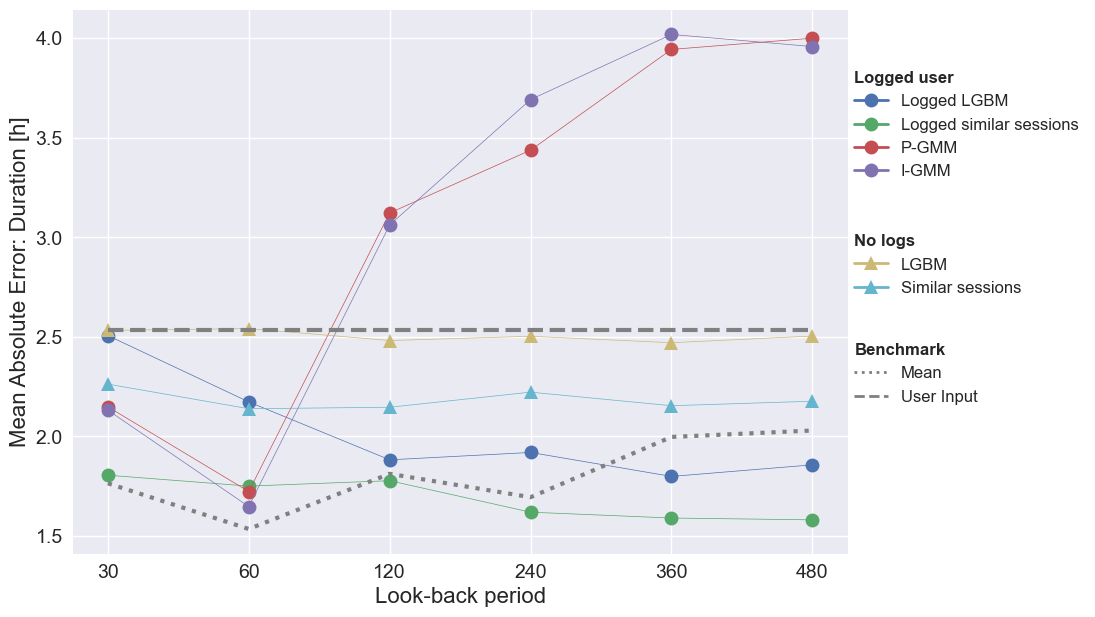

In [65]:
make_plot(errors, "Mean Absolute Error: Duration [h]")


In [52]:
def make_plot(errors, yaxis_title, hide_legend=False):
    # create two categories for logged and unlogged data
    category_dict = {
        "Logged LGBM": "Logged user",
        "Logged similar sessions": "Logged user",
        "P-GMM": "Logged user",
        "I-GMM": "Logged user",
        "LGBM": "No logs",
        "Similar sessions": "No logs",
    }

    handles1 = []
    labels1 = []
    handles2 = []
    labels2 = []
    handles3 = []
    labels3 = []
    markers = itertools.cycle(("o", "o", "o", "o", "^", "^"))
    for columns, category in category_dict.items():
        line = (
            errors[columns]
            .plot(marker=next(markers), markersize=10, linewidth=0.5, figsize=(10, 8))
            .lines[0]
        )
        if category == "Logged user":
            handles1.append(line)
            labels1.append(columns)
        elif category == "No logs":
            handles2.append(line)
            labels2.append(columns)
        else:
            handles3.append(line)
            labels3.append(columns)
    # make the mean line dashed
    line_mean = errors["Mean"].plot(style=":", color="grey", linewidth=3).lines[0]
    # User Input Line dashed line on the same axis
    line_user = (
        errors["User Input"].plot(style="--", color="grey", linewidth=3).lines[0]
    )
    handles3.append(line_mean)
    labels3.append("Mean")
    handles3.append(line_user)
    labels3.append("User Input")

    plt.style.use("seaborn-v0_8")
    plt.xlabel("Look-back period", fontsize=16)
    plt.ylabel(yaxis_title, fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # make second legend for unlogged data
    legend2 = plt.legend(
        handles2,
        labels2,
        bbox_to_anchor=(1, 0.6),
        loc=2,
        borderaxespad=0,
        prop={"size": 12},
        title="No logs",
    )
    # make third legend for benchmarks
    legend3 = plt.legend(
        handles3,
        labels3,
        bbox_to_anchor=(1, 0.4),
        loc=2,
        borderaxespad=0.0,
        prop={"size": 12},
        title="Benchmark",
    )
    plt.gca().add_artist(legend2)
    plt.gca().add_artist(legend3)
    # make first legend for logged data
    legend1 = plt.legend(
        handles1,
        labels1,
        bbox_to_anchor=(1, 0.9),
        loc=2,
        borderaxespad=0.0,
        prop={"size": 12},
        title="Logged user",
    )
    legend2.set_title("No logs", prop={"size": 12})

    # set the linewidth of each legend object
    for legobj in legend1.legendHandles:
        legobj.set_linewidth(2.0)
    for legobj in legend2.legendHandles:
        legobj.set_linewidth(2.0)
    for legobj in legend3.legendHandles:
        legobj.set_linewidth(2.0)

    # align the legend title to the left
    legend1._legend_box.align = "left"
    legend2._legend_box.align = "left"
    legend3._legend_box.align = "left"

    # make the legend title bold
    plt.setp(legend1.get_title(), fontweight="bold")
    plt.setp(legend2.get_title(), fontweight="bold")
    plt.setp(legend3.get_title(), fontweight="bold")

    # make the legend title same size as the rest of the legend
    plt.setp(legend1.get_title(), fontsize=12)
    plt.setp(legend2.get_title(), fontsize=12)
    plt.setp(legend3.get_title(), fontsize=12)

    # make a list of colors of the lines in the plot
    colors = [line.get_color() for line in plt.gca().get_lines()]
    # manually set the legend colours
    for i in range(len(legend1.legendHandles)):
        legend1.legendHandles[i].set_color(colors[i])
    for i in range(len(legend2.legendHandles)):
        legend2.legendHandles[i].set_color(colors[i + len(legend1.legendHandles)])
        # set markers to traingles
        legend2.legendHandles[i].set_marker("^")
    # legend3 set handles styles and color to grey
    legend3.legendHandles[0].set_color("grey")
    legend3.legendHandles[0].set_linestyle(":")
    legend3.legendHandles[1].set_color("grey")
    legend3.legendHandles[1].set_linestyle("--")
    # remove marker from legend
    legend3.legendHandles[0].set_marker(None)
    legend3.legendHandles[1].set_marker(None)

    # adjust spacing between the two legends
    plt.subplots_adjust(bottom=0.2)

    # plt.savefig('plots/mae_duration.png', dpi=300, bbox_inches='tight')
    # hide all legends
    if hide_legend:
        legend1.set_visible(False)
        legend2.set_visible(False)
        legend3.set_visible(False)
    plt.show()
